In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\Admin\Downloads\Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.shape

(891, 12)

# Exploratory Data Analysis

Missing Data

In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

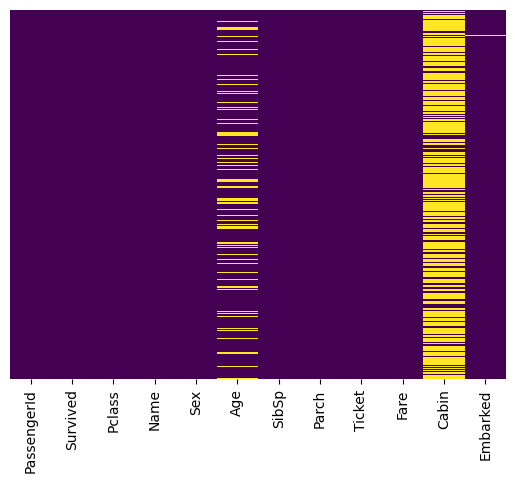

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. 

<Axes: xlabel='Survived', ylabel='count'>

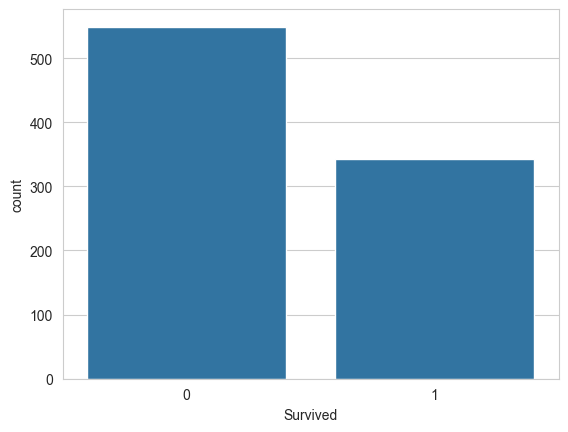

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

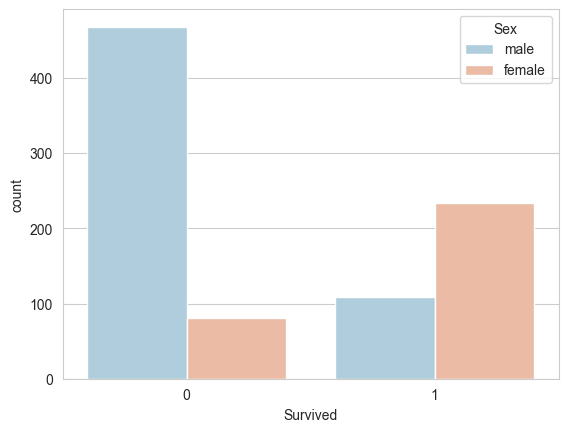

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

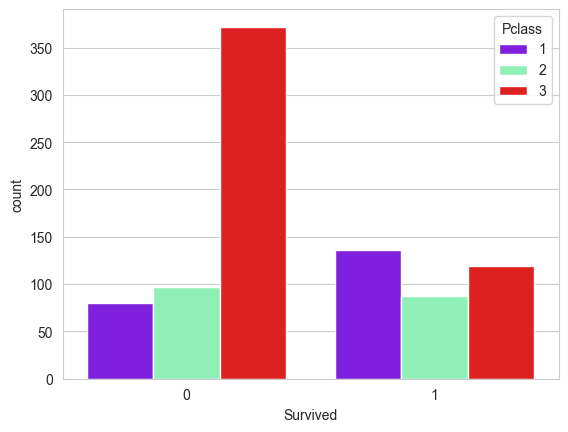

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: xlabel='Age', ylabel='Count'>

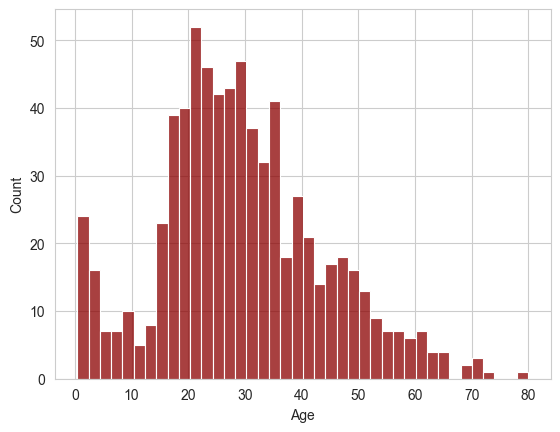

In [14]:
sns.histplot(data=df, x='Age', bins=40, color='darkred')

<Axes: >

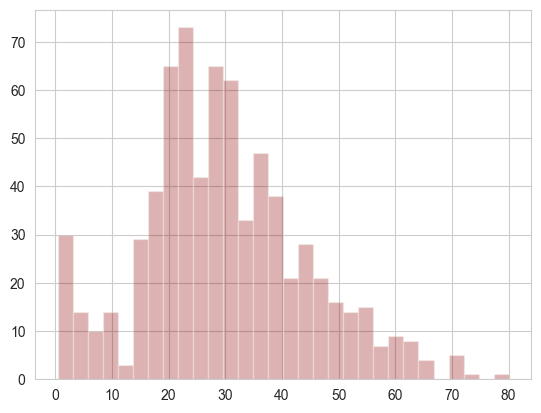

In [15]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

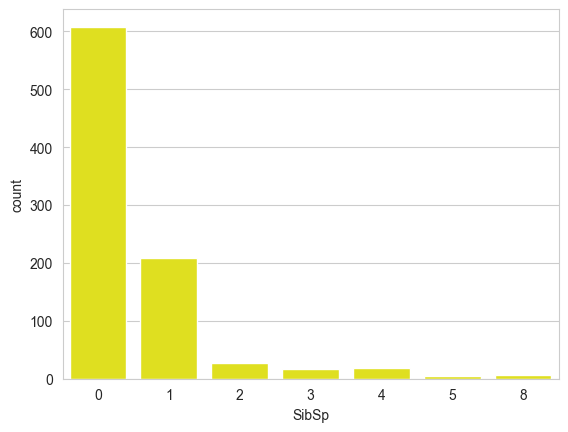

In [16]:
sns.countplot(x='SibSp',data=df,color='yellow')

<Axes: >

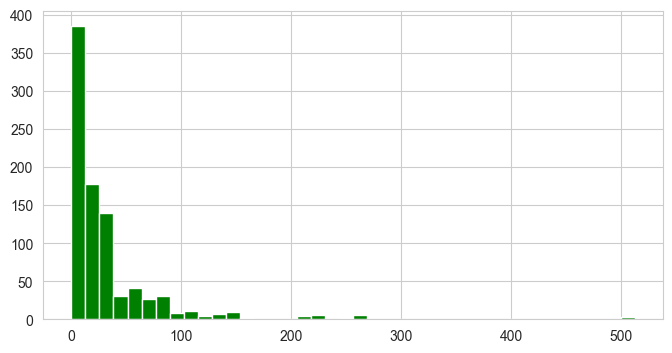

In [17]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

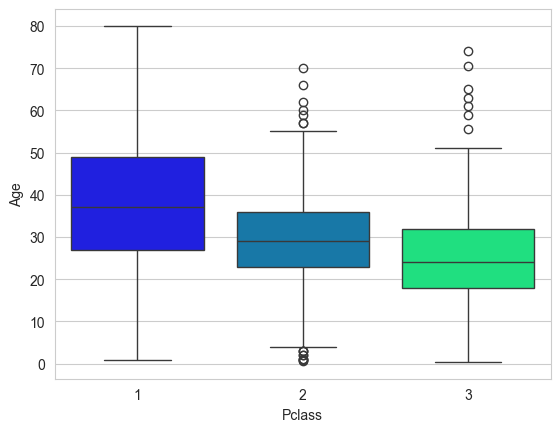

In [18]:
sns.boxplot(x='Pclass', y='Age', data=df, hue='Pclass', palette='winter', legend=False)

In [19]:
#drop the cabin column
df.drop(columns=['Cabin'],inplace=True)

In [20]:
# fill the missing value of the column age

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [21]:
# inpute missing value of Embarked column
df['Embarked'].value_counts()
df['Embarked'] = df['Embarked'].fillna('S')

<Axes: >

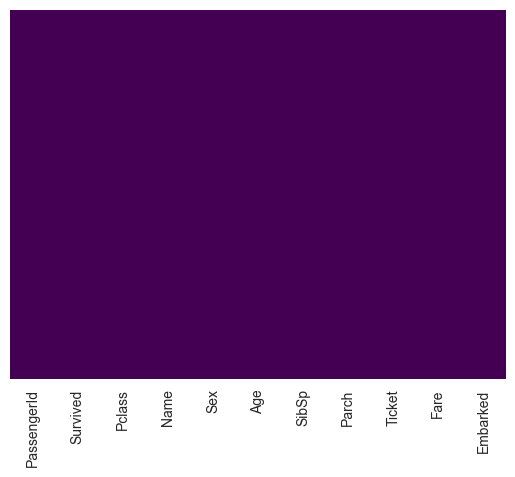

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
summary_stats = df.describe().T  

# Add median separately
summary_stats['median'] = df.median(numeric_only=True)

# Display the result
print(summary_stats)

             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max    median  
PassengerId  891.0000  446.0000  
Survived       1.0000    0.0000  
Pclass         3.0000    3.0000  
Age           80.0000   28.0000  
SibSp          8.0000    0.0000  
Parch          6.0000    0.0000  
Fare         512.3292   14.4542  


# 

In [37]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


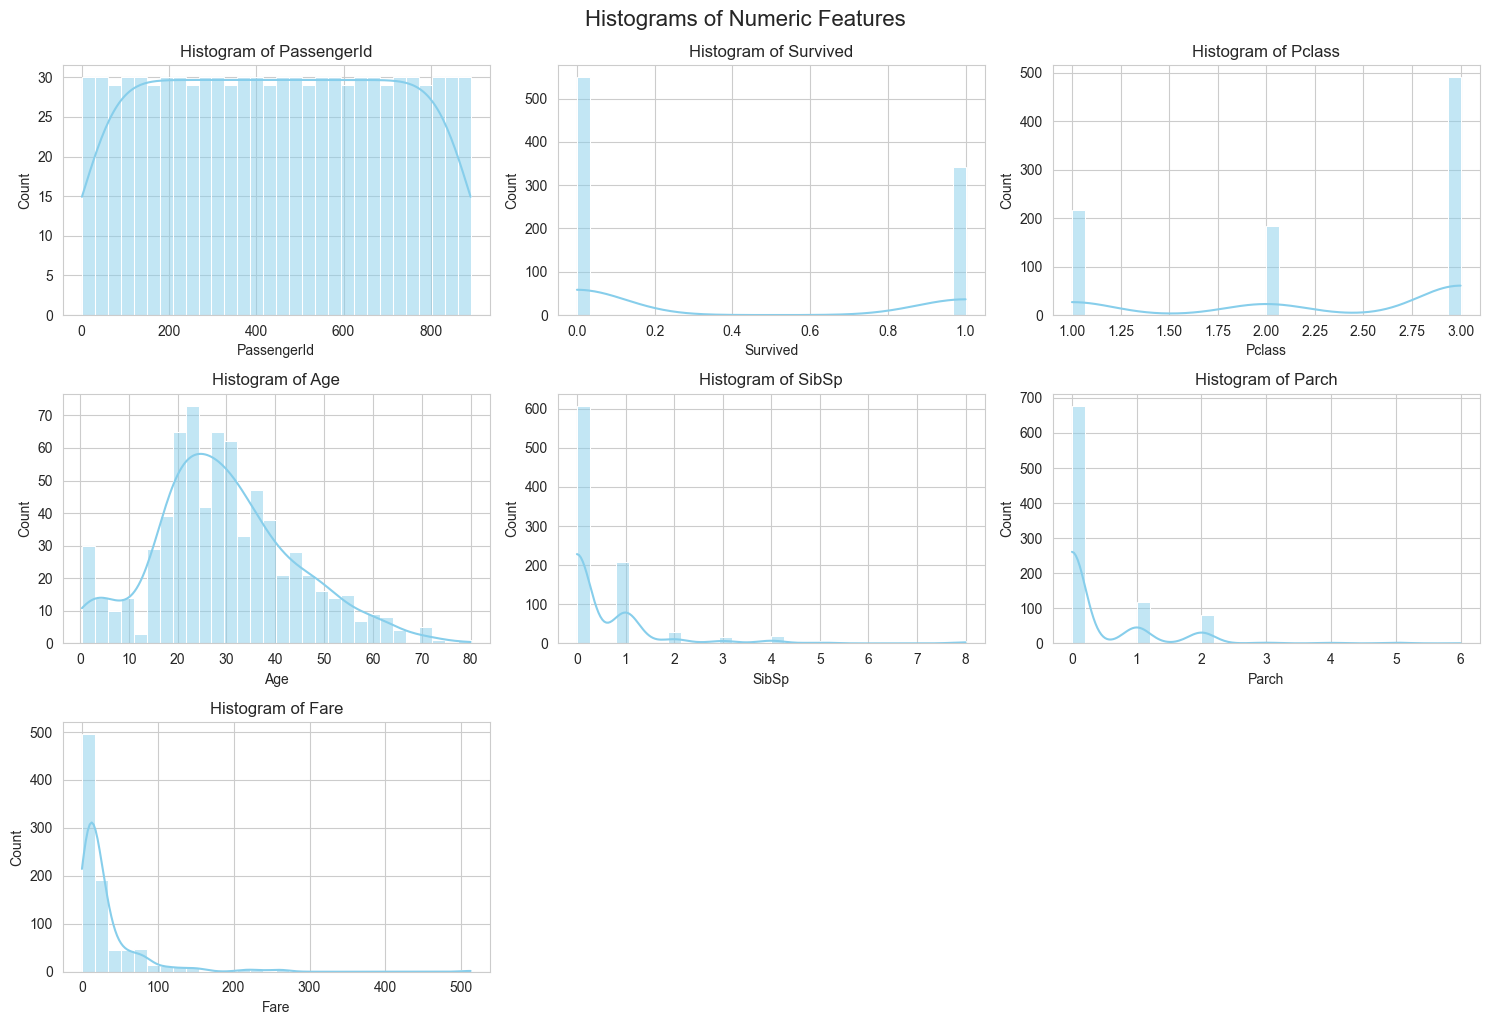

In [38]:
# Create histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.suptitle('Histograms of Numeric Features', fontsize=16, y=1.02)
plt.show()

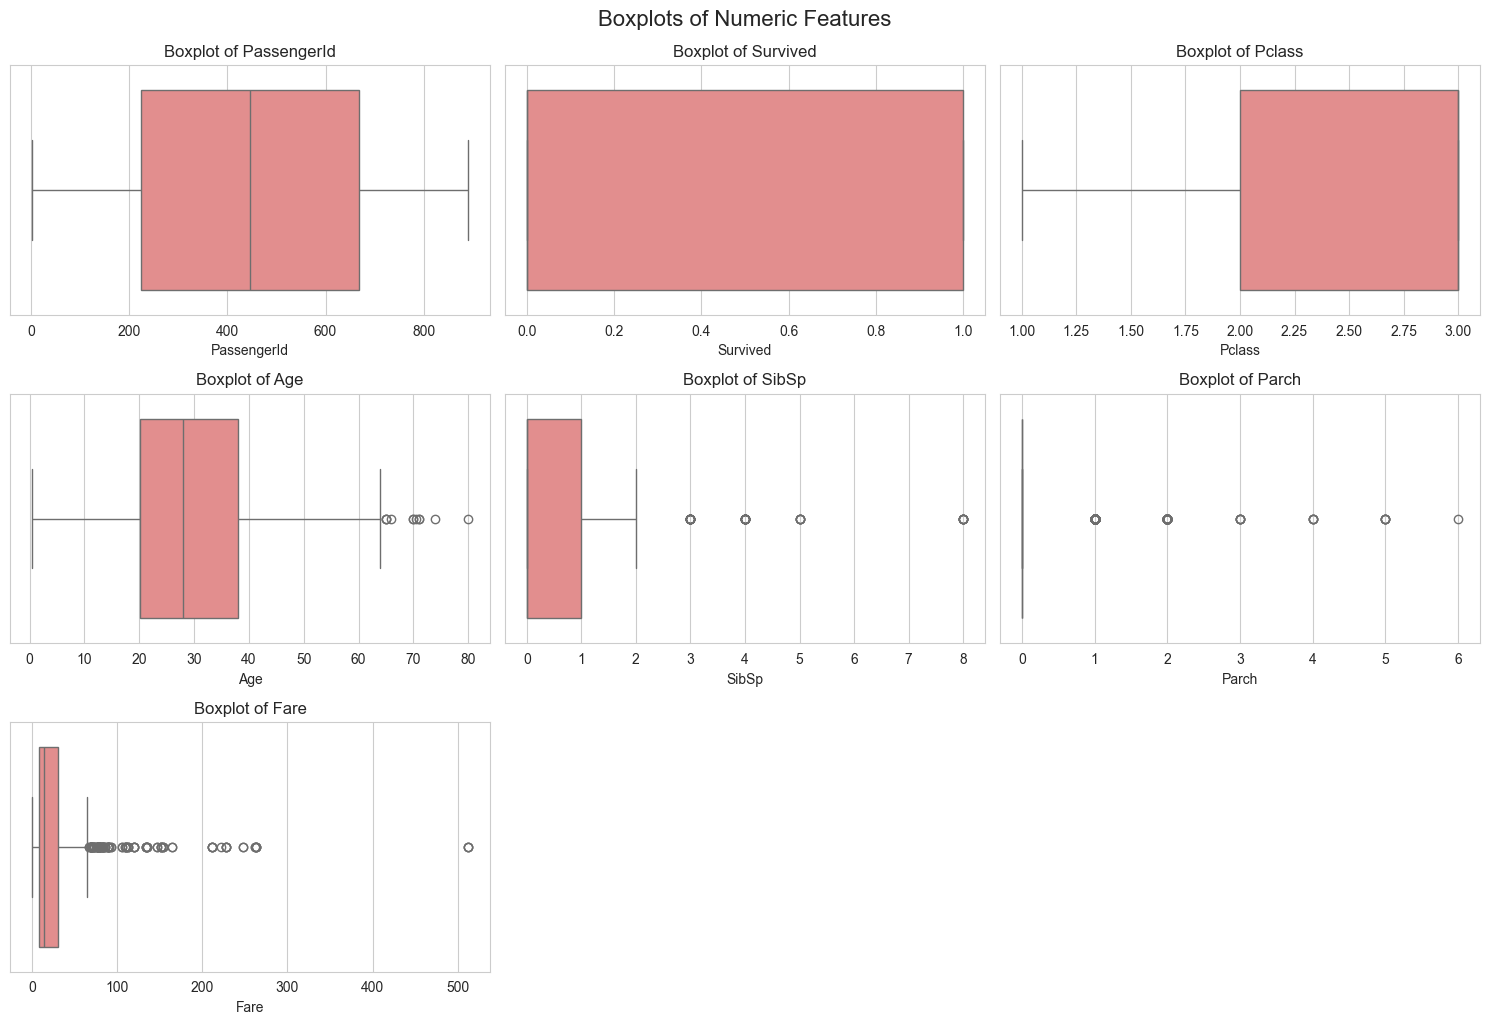

In [39]:
# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.suptitle('Boxplots of Numeric Features', fontsize=16, y=1.02)
plt.show()

#  pairplot and correlation matrix 

In [40]:
# Select relevant numeric columns for correlation and pairplot
selected_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


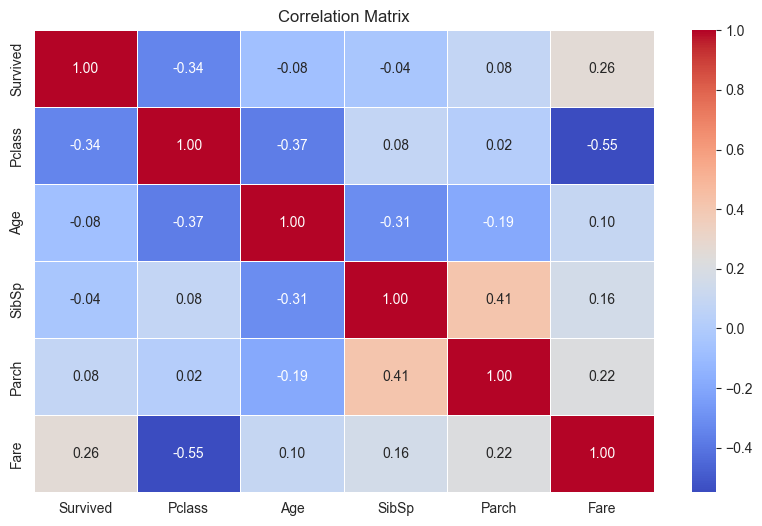

In [41]:
# Plot the correlation matrix
plt.figure(figsize=(10, 6))
correlation = df[selected_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

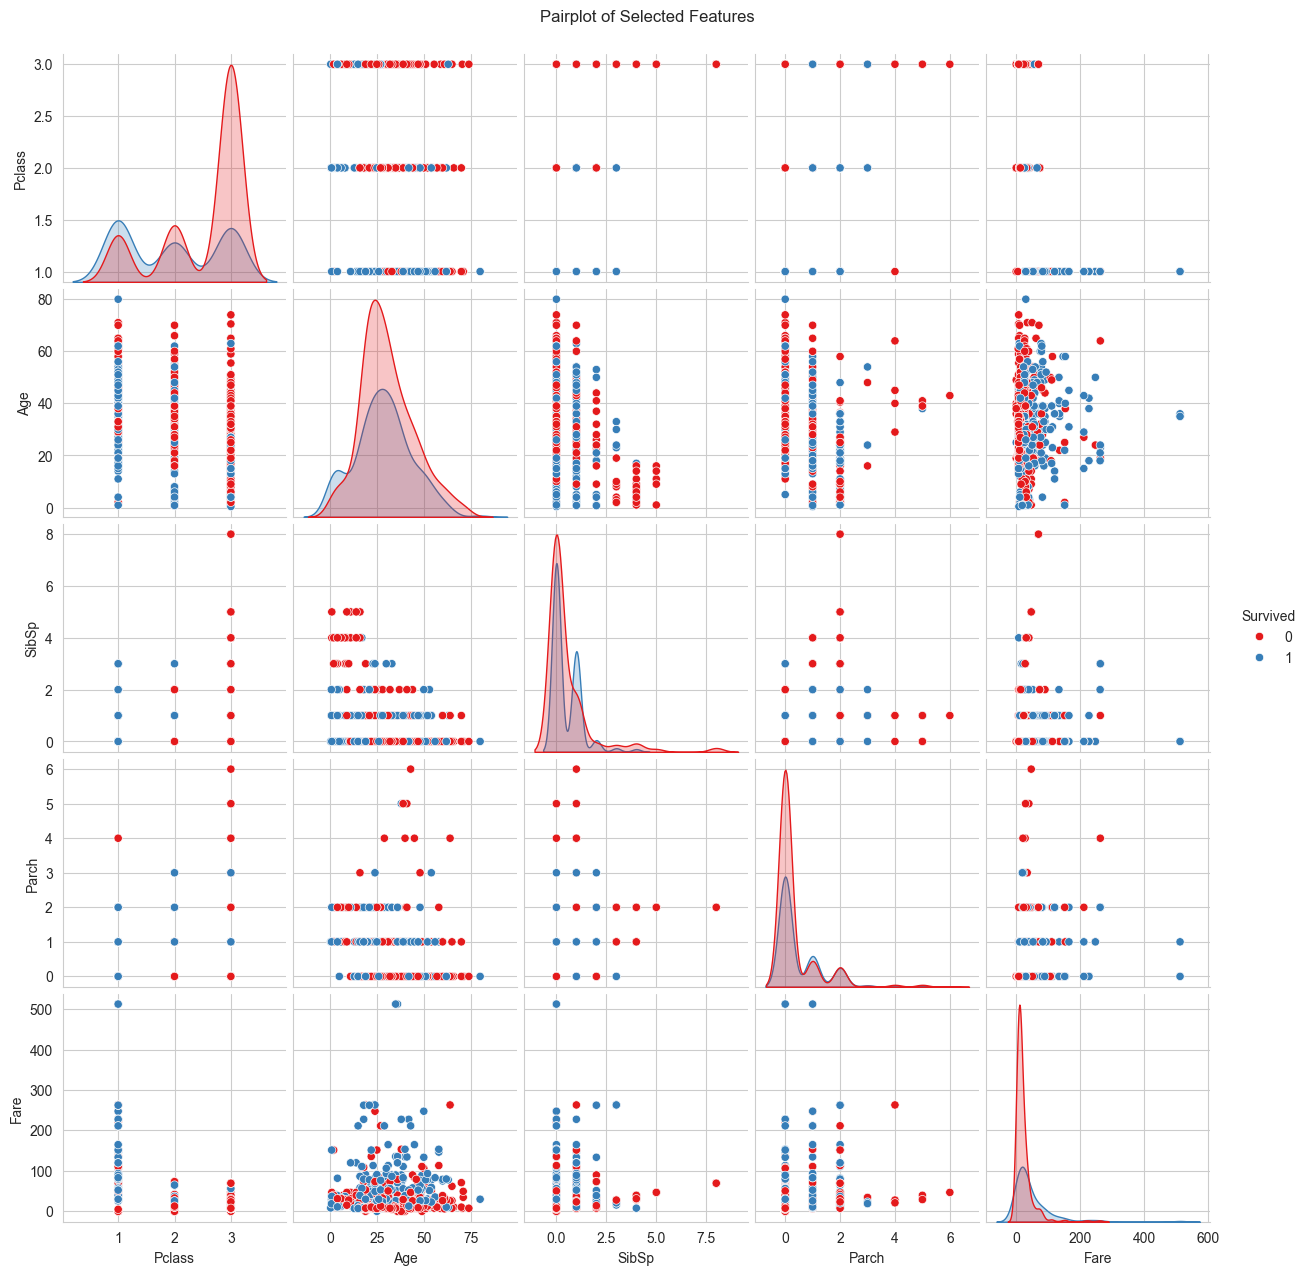

In [42]:
# Pairplot to visualize relationships
sns.pairplot(df[selected_cols], hue='Survived', palette='Set1')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Patterns & Trends

Survival & Gender:

In [43]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Pclass & Survival:

In [44]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#  Anomalies

Fare:
Extreme outliers with fares > 300 — very few people paid that high.
Suggests VIP or very wealthy passengers.

Age:
Ages as low as 0.42 years (infants) and as high as 80.
Some missing values – about 177 entries.

Missing Data:
Age, Cabin, and Embarked have null values.
Especially Cabin, which has many missing values and might need to be dropped or processed carefully.

# Feature-Level Inferences

Pclass (Passenger Class):
Lower Pclass (1st class) passengers had higher survival rates.
The fare distribution shows that 1st class passengers paid more and were treated with priority.

Age:
Most passengers were aged 20–40.
Children (0–12) had better survival rates — priority might’ve been given during evacuation.
Seniors (60+) had low survival, possibly due to mobility or health.

Fare:
Highly skewed — a few passengers paid very high fares (possibly rich or VIPs).
Higher fare → Higher survival rate (likely tied to better class and facilities).

SibSp & Parch:
Most people had no siblings/spouses or parents/children aboard.
Small families (1–2 members) had slightly better survival.
Large families showed lower survival — possibly due to difficulty in managing everyone.

Survived:
Only about 38% survived, as seen in the summary stats.
Survival is influenced most by Pclass, Age, and indirectly by Fare.

